In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
License(s): ODbL-1.0
 95% 113M/119M [00:01<00:00, 87.0MB/s] 
100% 119M/119M [00:01<00:00, 89.8MB/s]


In [ ]:
!ls

chest-ctscan-images.zip  InceptionV3.ipynb  ResNet101.ipynb   seg_train
Data			 kaggle.json	    ResNet50V2.ipynb  VGG19.ipynb
DenseNet201.ipynb	 MobileNet.ipynb    seg_pred	      Xray_Classifier
InceptionResNetV2.ipynb  README.txt	    seg_test


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  chest-ctscan-images.zip
replace Data/test/adenocarcinoma/000108 (3).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

chest-ctscan-images.zip  InceptionV3.ipynb  ResNet101.ipynb   seg_train
Data			 kaggle.json	    ResNet50V2.ipynb  VGG19.ipynb
DenseNet201.ipynb	 MobileNet.ipynb    seg_pred	      Xray_Classifier
InceptionResNetV2.ipynb  README.txt	    seg_test


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications import DenseNet201
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from glob import glob

In [4]:
train_path = "/content/drive/MyDrive/Colab Notebooks/Data/train/"
test_path = "/content/drive/MyDrive/Colab Notebooks/Data/test/"

In [5]:
sinif_sayisi = len(glob(train_path + "/*"))
sinif_sayisi

4

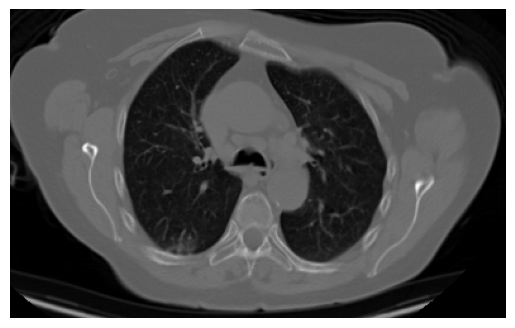

In [6]:
img = load_img(train_path + "/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000005 (9).png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
image_shape= img_to_array(img)
image_shape.shape

(244, 392, 3)

In [8]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


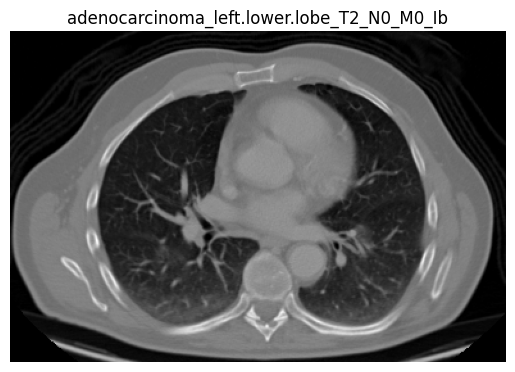

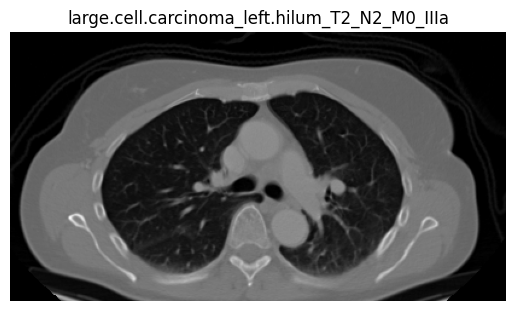

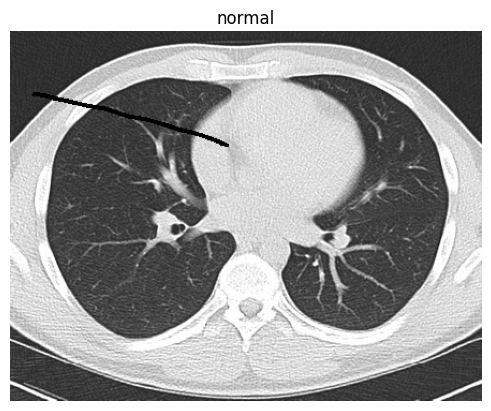

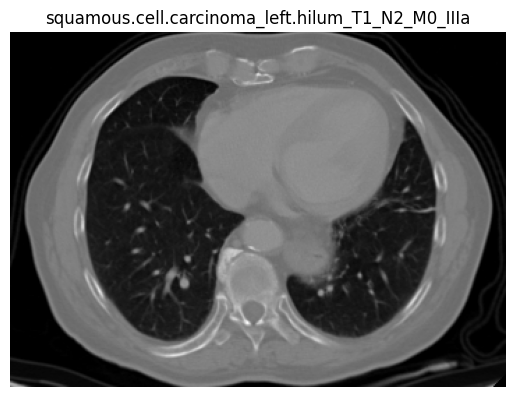

In [9]:
for i in os.listdir(train_path):
  for j in os.listdir(train_path + i):
    img = load_img(train_path +i + "/" + j)
    plt.imshow(img)
    plt.title(i)
    plt.axis("off")
    plt.show()
    break

In [10]:
densenet = DenseNet201()

82524592/82524592 [==============================] - 1s 0us/step


In [11]:
densenet.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [12]:
base_model = DenseNet201(weights = "imagenet", include_top = False, input_shape=(224,224,3))

74836368/74836368 [==============================] - 1s 0us/step


In [13]:
from keras.layers import GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [14]:
model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [18]:
history = model.fit(train_data, validation_data= test_data, batch_size = 64, epochs = 5)

Epoch 1/5
20/20 [==============================] - 440s 21s/step - loss: 1.6383 - accuracy: 0.4780 - val_loss: 1.0829 - val_accuracy: 0.4667
Epoch 2/5
20/20 [==============================] - 233s 12s/step - loss: 0.9186 - accuracy: 0.6150 - val_loss: 1.0778 - val_accuracy: 0.5302
Epoch 3/5
20/20 [==============================] - 238s 12s/step - loss: 0.6550 - accuracy: 0.7488 - val_loss: 1.2314 - val_accuracy: 0.4857
Epoch 4/5
20/20 [==============================] - 237s 12s/step - loss: 0.5318 - accuracy: 0.8075 - val_loss: 0.8760 - val_accuracy: 0.5841
Epoch 5/5
20/20 [==============================] - 298s 15s/step - loss: 0.4580 - accuracy: 0.8303 - val_loss: 1.1171 - val_accuracy: 0.5365


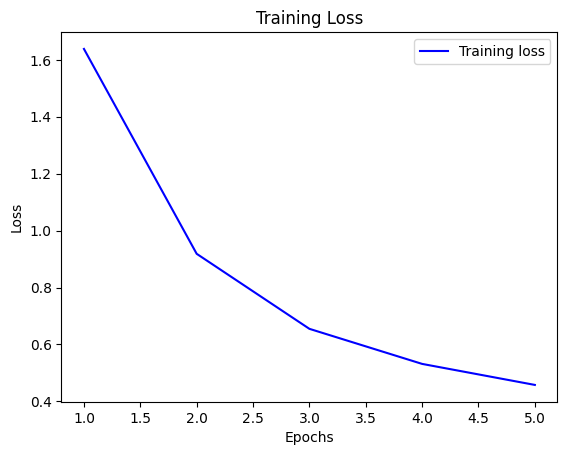

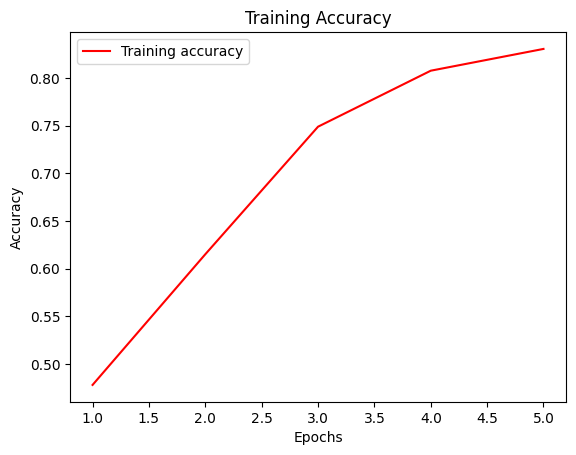

In [21]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()